In [1]:
import qiskit
import numpy as np
import qtm.base, qtm.constant, qtm.nqubit, qtm.fubini_study
import importlib
importlib.reload(qtm.fubini_study)
importlib.reload(qtm.nqubit)
importlib.reload(qtm.base)
importlib.reload(qtm.constant)

<module 'qtm.constant' from 'c:\\Users\\HAI\\Desktop\\vutuanhai\\QuantumTomography\\codes\\qtm\\constant.py'>

### GHZ

In [2]:
qubits = range(2, 11)
variances = []
for num_qubits in qubits:
    print(num_qubits)
    # Init parameters
    num_layers = 2
    # thetas = np.random.uniform(low = 0, high = 1, size = num_layers*(2*num_qubits - 2)) 
    theta = np.pi / 2
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    grads = []
    for i in range(0, 200):
        # if i % 10 == 0:
        #     print(i)
        thetas = np.random.uniform(low= 0, high= 2 * np.pi, size=num_layers*(2*num_qubits - 2))
        G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
        grad_loss = qtm.base.grad_loss(
            qc, 
            qtm.nqubit.create_GHZchecker_star2graph,
            thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
        grad = np.linalg.inv(G) @ grad_loss
        grads.append(grad[-1])
    print(np.var(grads))
    variances.append(np.var(grads))

2
0.27085798507381925
3
0.1271022219
4
0.03649865937499999
5
0.012815382519000001
6
0.003652557391000001
7
0.0014441323840000003
8
0.0005664390710000003
9
6.0335879000000016e-05
10


KeyboardInterrupt: 

-1.2257922776814651


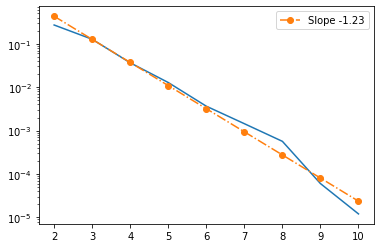

In [7]:
from matplotlib import pyplot as plt
num_qubits = range(2, 11)
variances = [
    0.27085798507381925, 
    0.1271022219,
    0.03649865937499999,
    0.012815382519000001,
    0.003652557391000001,
    0.0014441323840000003,
    0.0005664390710000003,
    6.0335879000000016e-05,
    1.2069670999999998e-05
]

variances = np.array(variances)
num_qubits = np.array(num_qubits)
p = np.polyfit(num_qubits, np.log(variances), 1)
print(p[0])
plt.plot(num_qubits, variances)
plt.semilogy(num_qubits, np.exp(p[0] * num_qubits + p[1]), "o-.", label="Slope {:3.2f}".format(p[0]))
plt.xticks(num_qubits)
plt.legend()
plt.show()

In [8]:
variances = []
t = []
for grad in grads:
    t.append((grad[-1]))
print(np.var(t))

3.5856628488361344
